![AIcrowd-Logo](https://images.aicrowd.com/raw_images/challenges/banner_file/762/0fc2c34209f840ff907f.jpg)


# Getting Started Code for [Stage Clustering Challenge](https://www.aicrowd.com/challenges/ai-blitz-7/problems/stage-clustering) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In [1]:
!pip install aicrowd-cli

## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [2]:
API_KEY = "ef7a6de81920f8871dd4807ae1327d69" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [3]:
!aicrowd dataset download --challenge stage-prediction -j 3

sample_submission.csv: 100% 13.3k/13.3k [00:00<00:00, 640kB/s]
test.zip: 100% 27.7M/27.7M [00:02<00:00, 13.6MB/s]


In [4]:
!rm -rf data
!mkdir data

!unzip test.zip -d data

Archive:  test.zip
  inflating: data/test/0.jpg         
  inflating: data/test/1.jpg         
  inflating: data/test/10.jpg        
  inflating: data/test/100.jpg       
  inflating: data/test/1000.jpg      
  inflating: data/test/1001.jpg      
  inflating: data/test/1002.jpg      
  inflating: data/test/1003.jpg      
  inflating: data/test/1004.jpg      
  inflating: data/test/1005.jpg      
  inflating: data/test/1006.jpg      
  inflating: data/test/1007.jpg      
  inflating: data/test/1008.jpg      
  inflating: data/test/1009.jpg      
  inflating: data/test/101.jpg       
  inflating: data/test/1010.jpg      
  inflating: data/test/1011.jpg      
  inflating: data/test/1012.jpg      
  inflating: data/test/1013.jpg      
  inflating: data/test/1014.jpg      
  inflating: data/test/1015.jpg      
  inflating: data/test/1016.jpg      
  inflating: data/test/1017.jpg      
  inflating: data/test/1018.jpg      
  inflating: data/test/1019.jpg      
  inflating: data/test/102.jpg 


## Import packages

In [5]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import cv2
import numpy as np
import pandas as pd

## Load & Generating Data 

In [6]:
test_imgs_directiory = "data/test"

In [7]:
all_imgs = []
img_ids_list = []

for count, img_name in enumerate(os.listdir(test_imgs_directiory)):

    img_path = os.path.join(test_imgs_directiory, img_name)
    img = cv2.imread(img_path, 0)

    all_imgs.append(img.flatten())
    img_ids_list.append(count)

## Visualize the data 👀

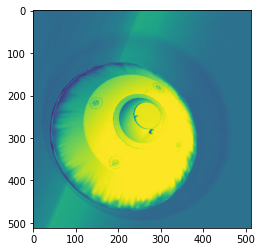

In [8]:
plt.imshow(img)

# Creating predictions

In [9]:
y_pred = KMeans(n_clusters=5, random_state=42,n_init=1,max_iter=1, verbose=True).fit_predict(all_imgs)


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 810821368860.2833


In [10]:
submission = {'ImageID':img_ids_list, "label":y_pred}

submission = pd.DataFrame(submission)
submission.to_csv('submission.csv',index=False)

In [11]:
submission

ImageID  label
0           0      3
1           1      0
2           2      3
3           3      1
4           4      4
...       ...    ...
1794     1794      4
1795     1795      2
1796     1796      1
1797     1797      1
1798     1798      2

[1799 rows x 2 columns]

## Making Direct Submission thought Aicrowd CLI

In [12]:
!aicrowd submission create -c stage-prediction -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 13.1/11.5 KB • 1.4 MB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                  
                                                 │ Successfully submitted! │                                                  
                                                 ╰─────────────────────────╯                                                  
                                                       Important links                                                        
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/problems/stage-prediction/submissions/125933              │
│                  │                                                                                                         │
│  All submissions │ https://w